In [10]:
# Install required libraries (if not already installed)
!pip install seaborn matplotlib scikit-learn pandas numpy

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [12]:
# Read the dataset
data = pd.read_csv("/content/city_day.csv.zip")

# Dataset overview
print(data.head())
print(data.info())
print(data.describe())


        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

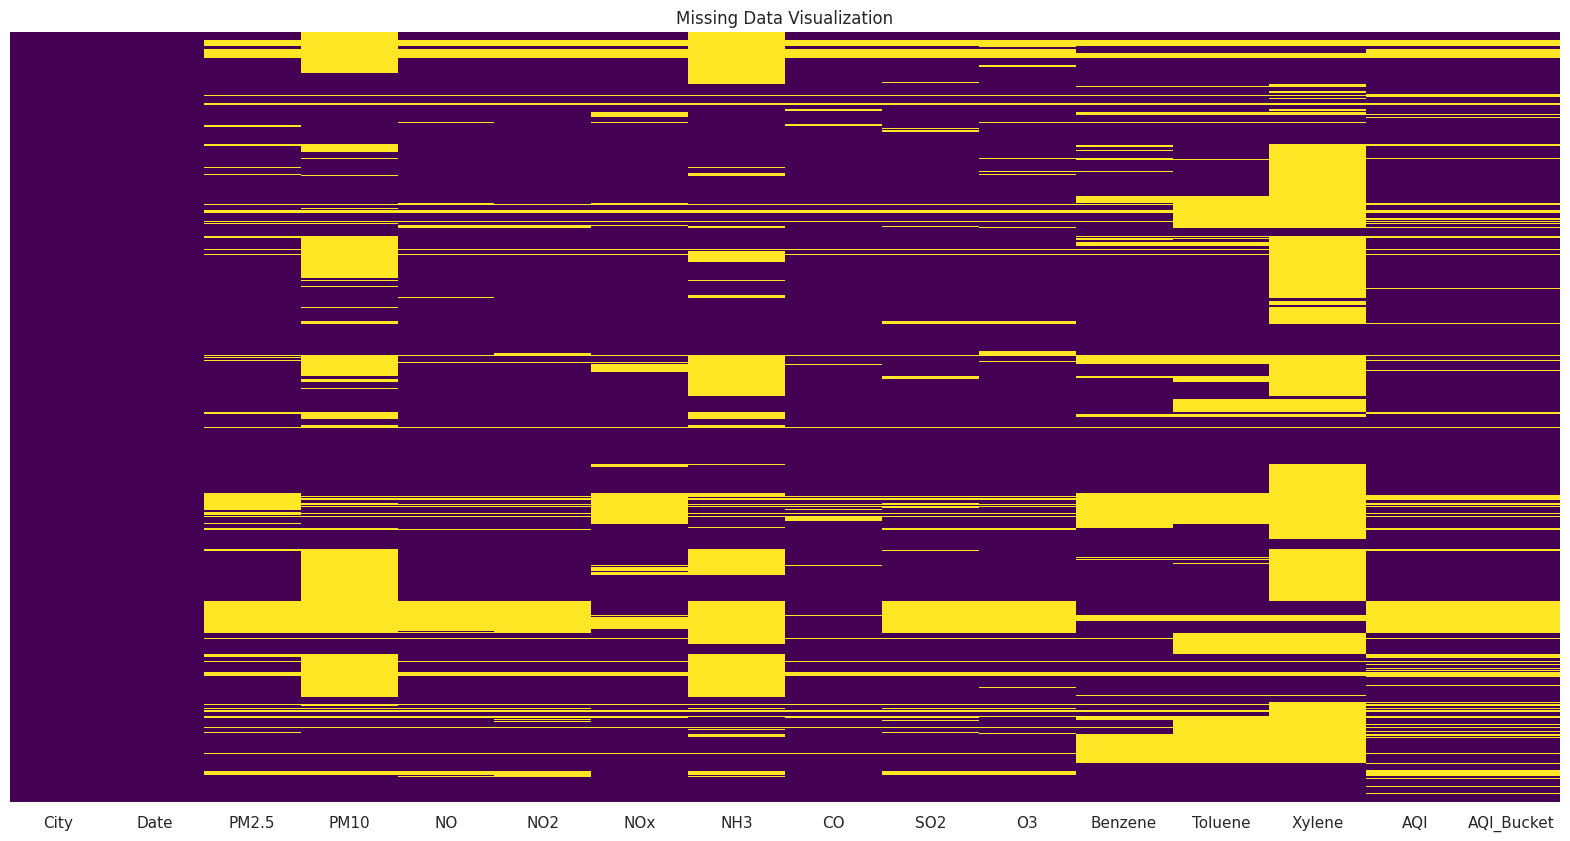

In [13]:
# Heatmap for missing data
plt.figure(figsize=(20, 10))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Visualization")
plt.show()


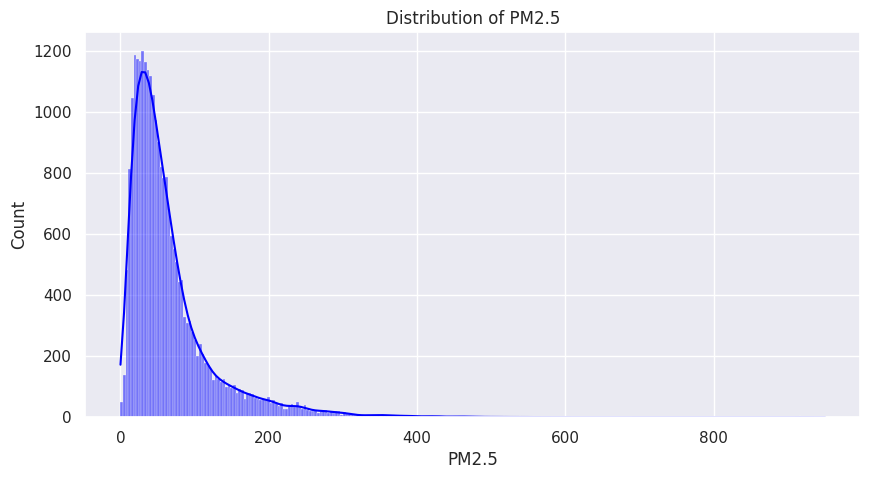

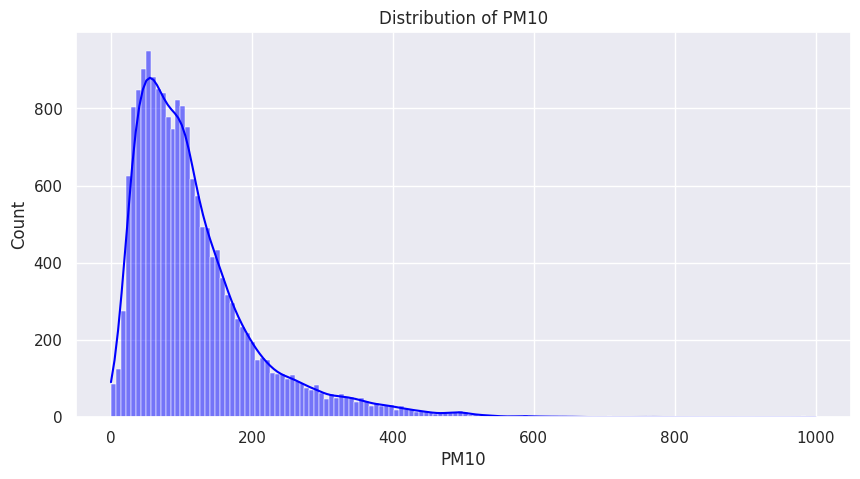

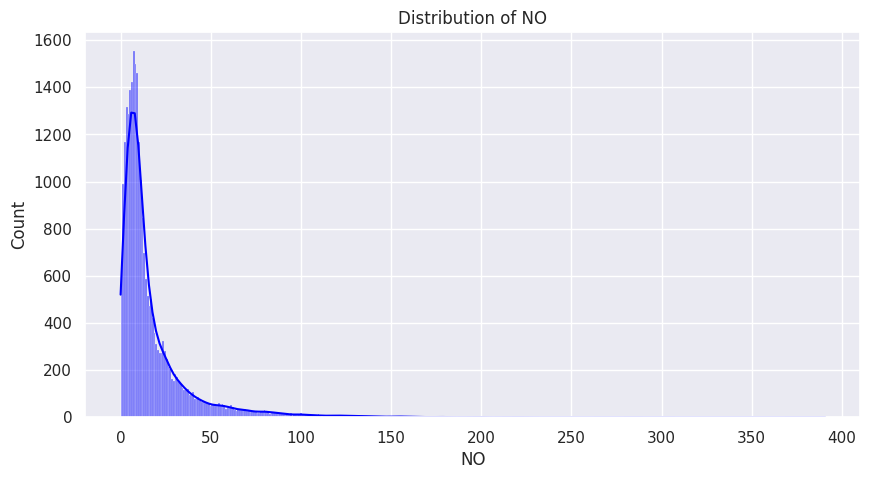

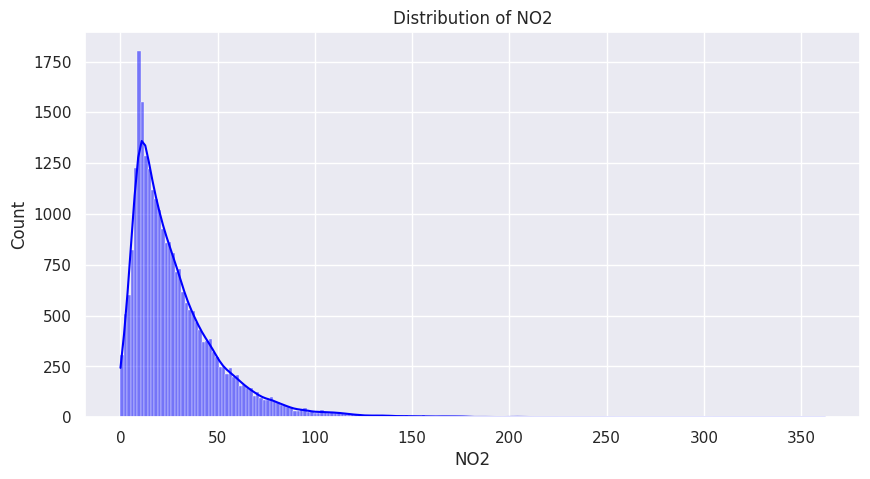

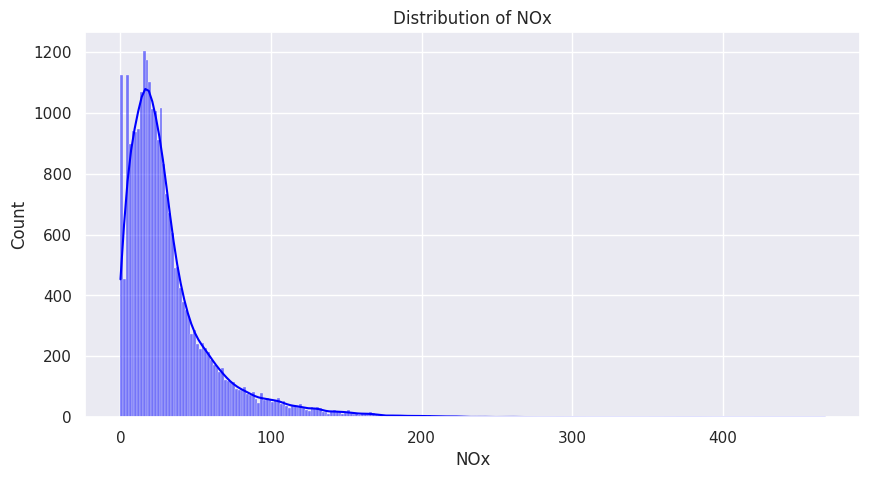

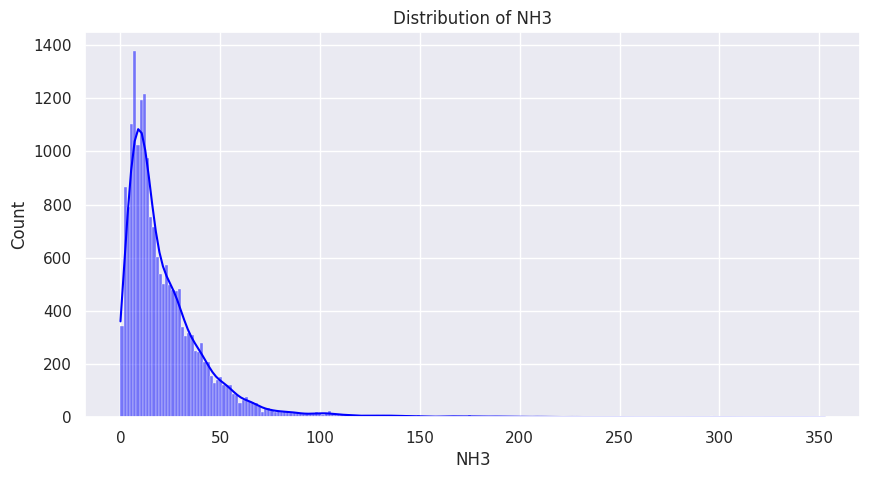

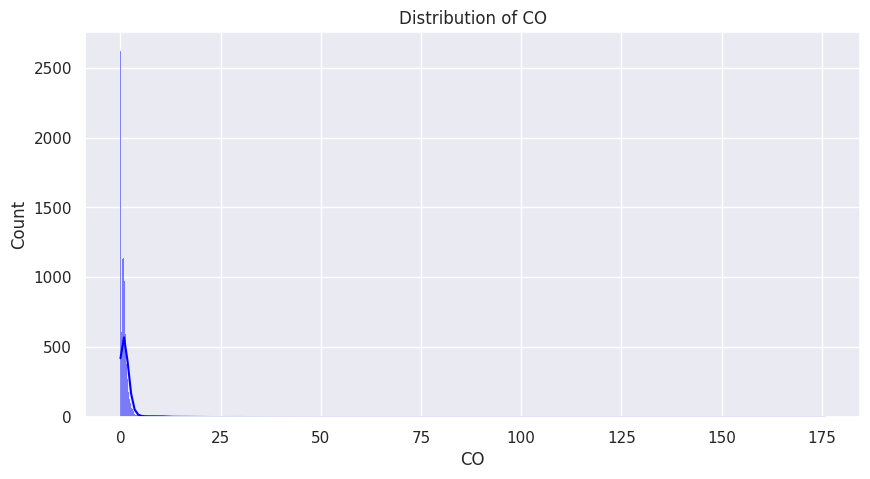

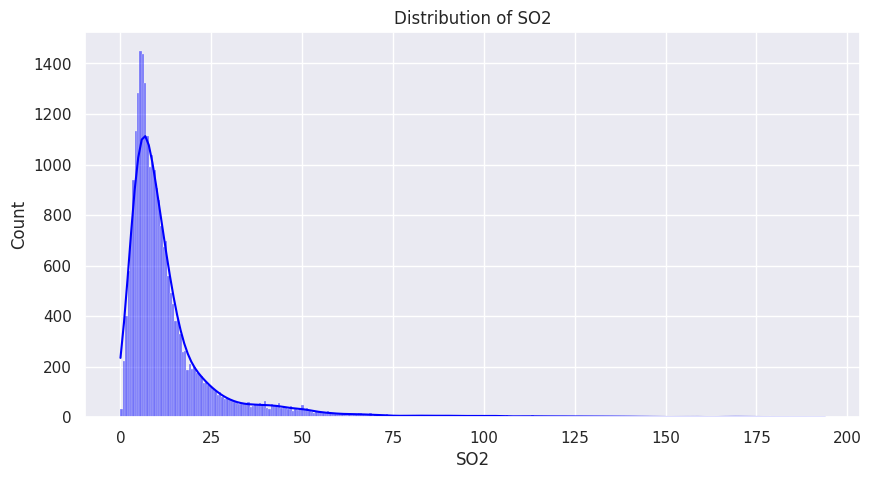

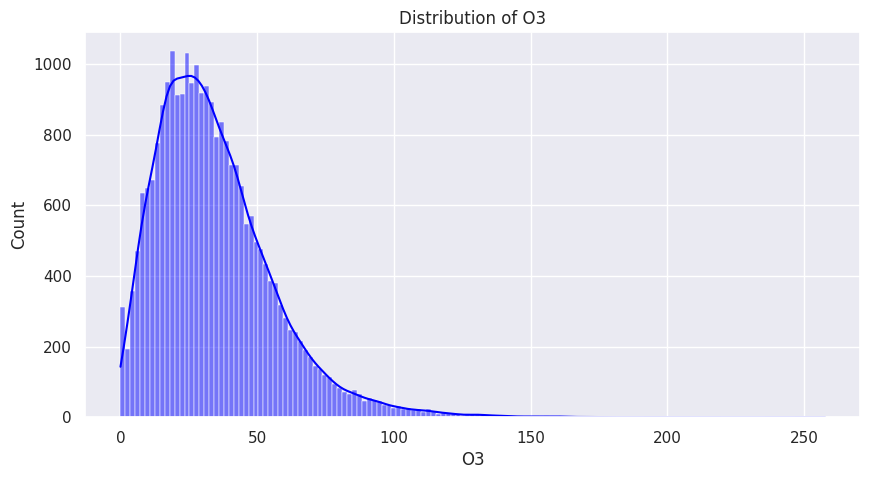

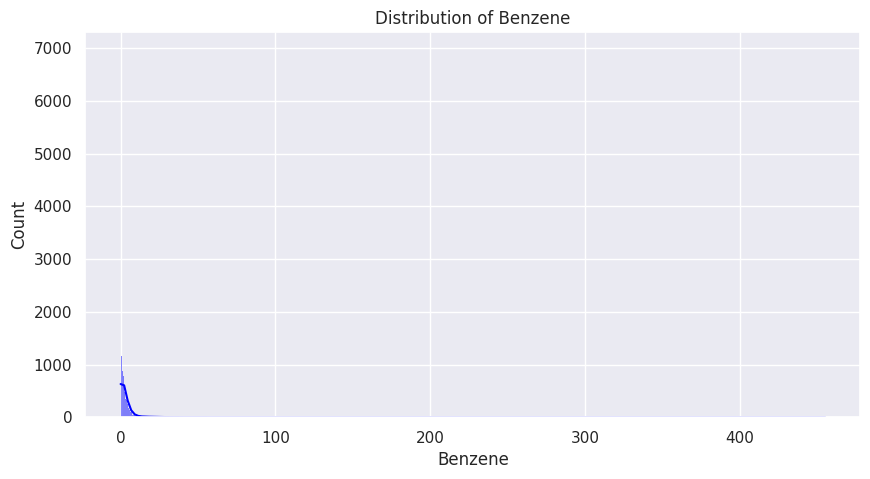

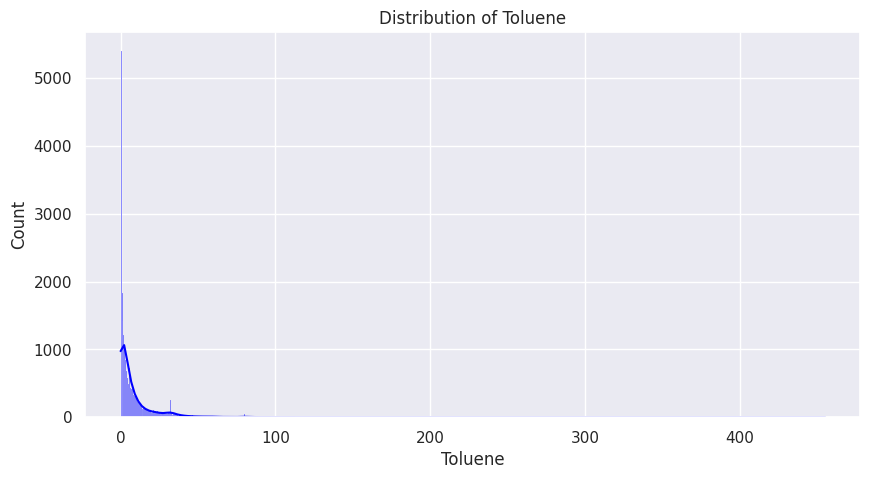

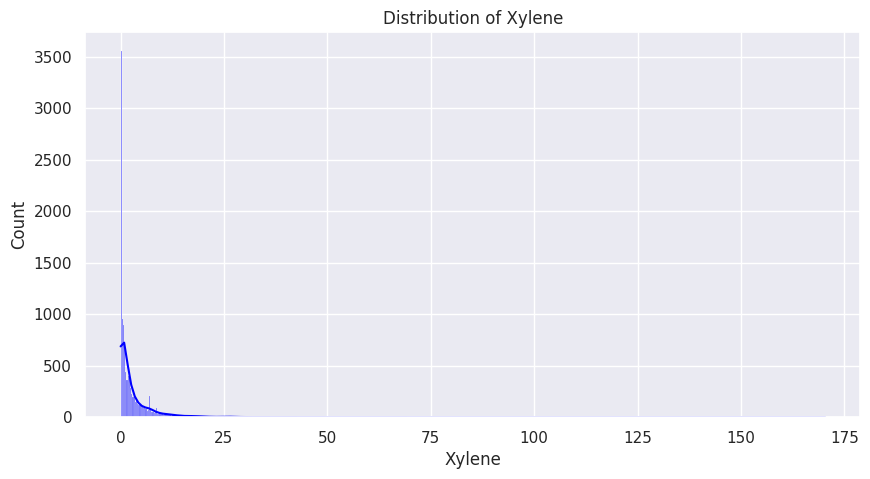

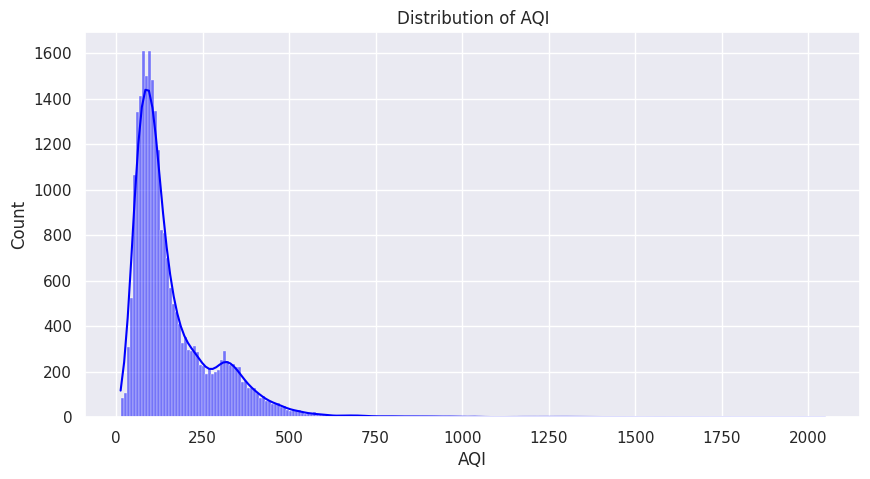

In [16]:
# Distribution plots
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()



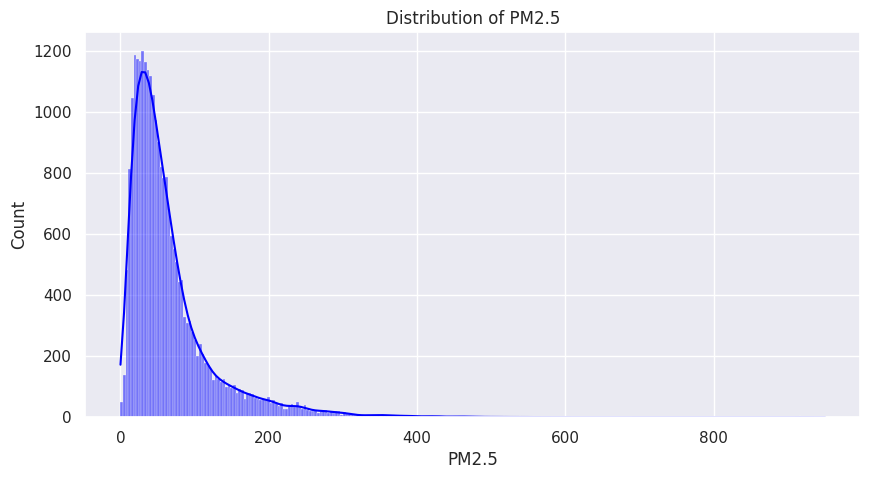

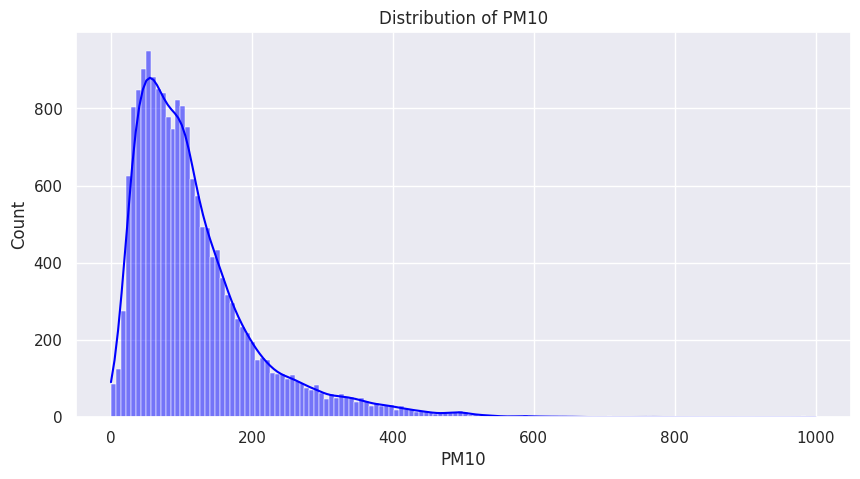

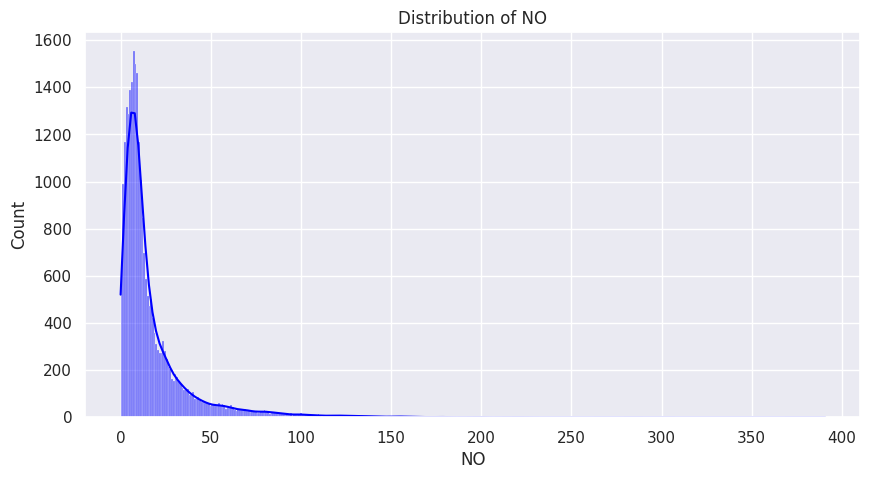

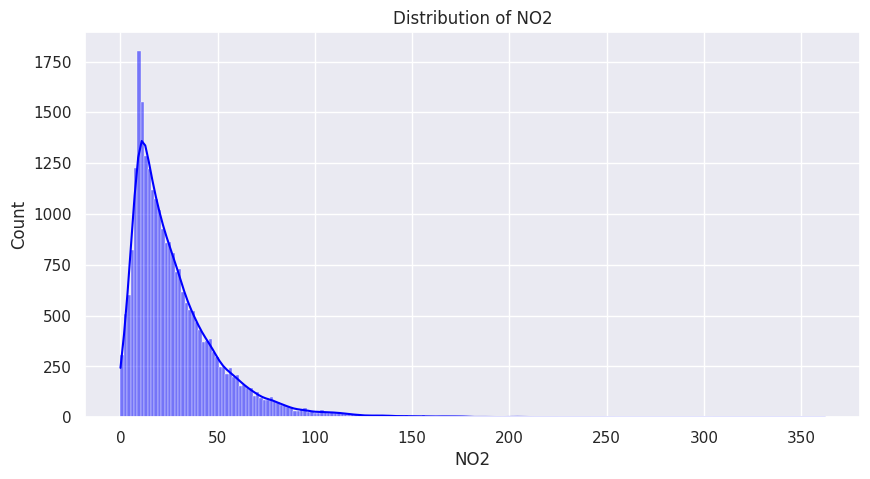

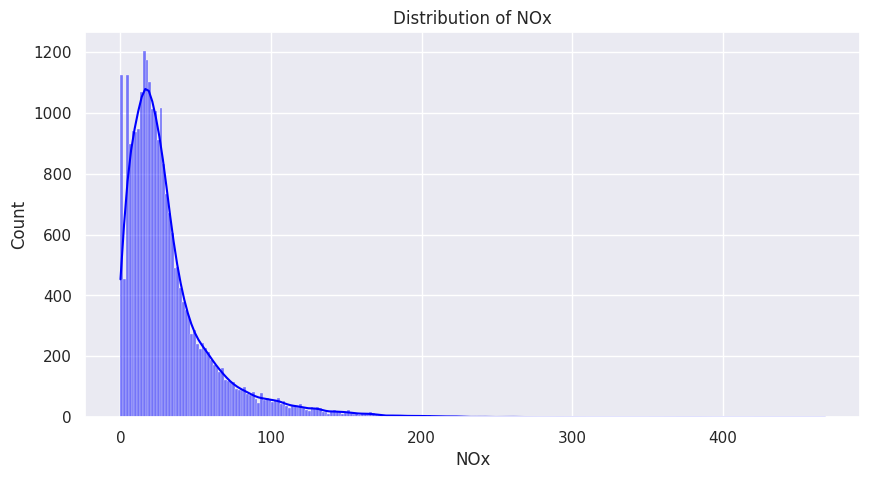

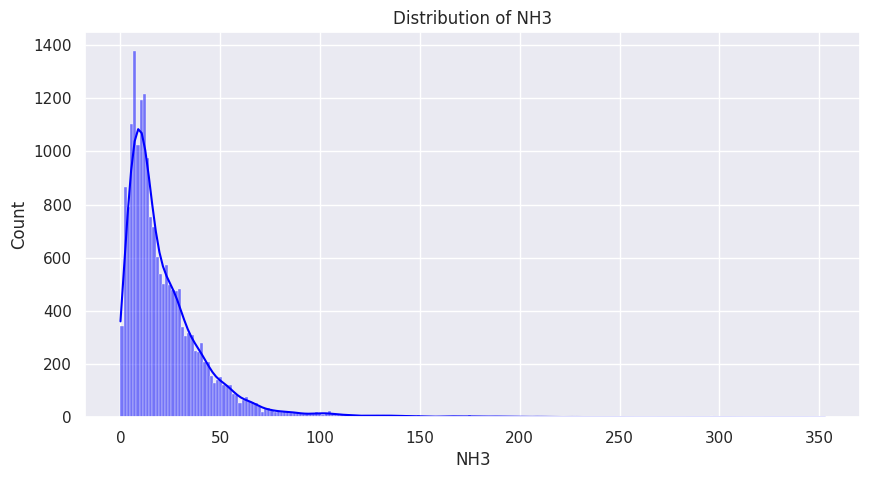

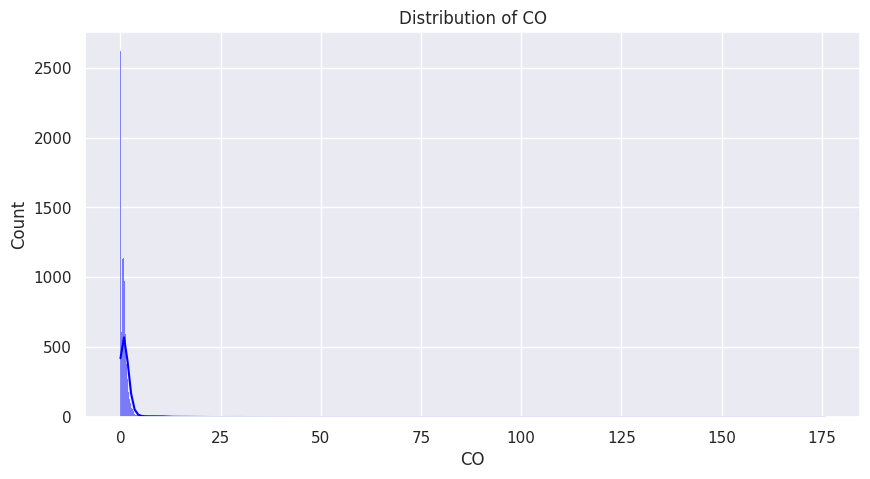

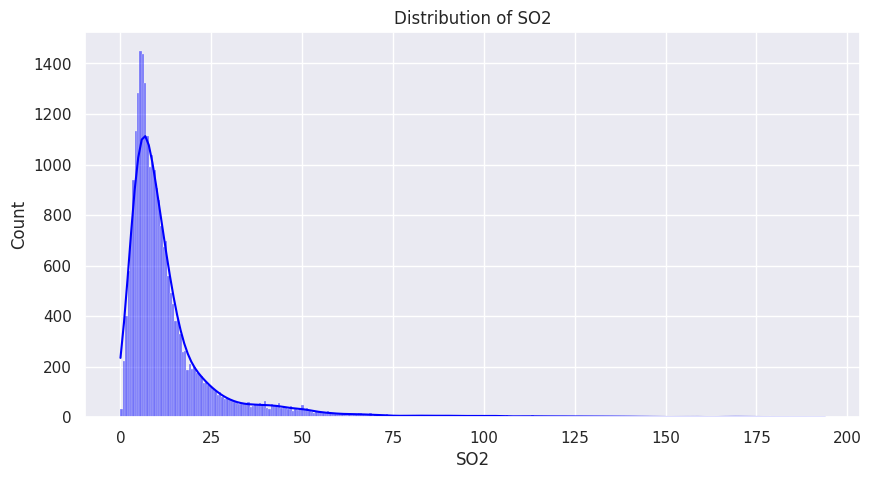

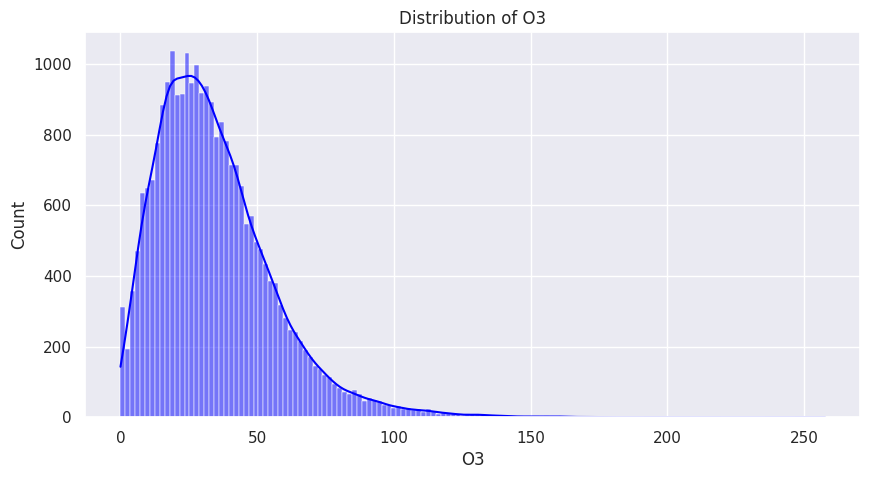

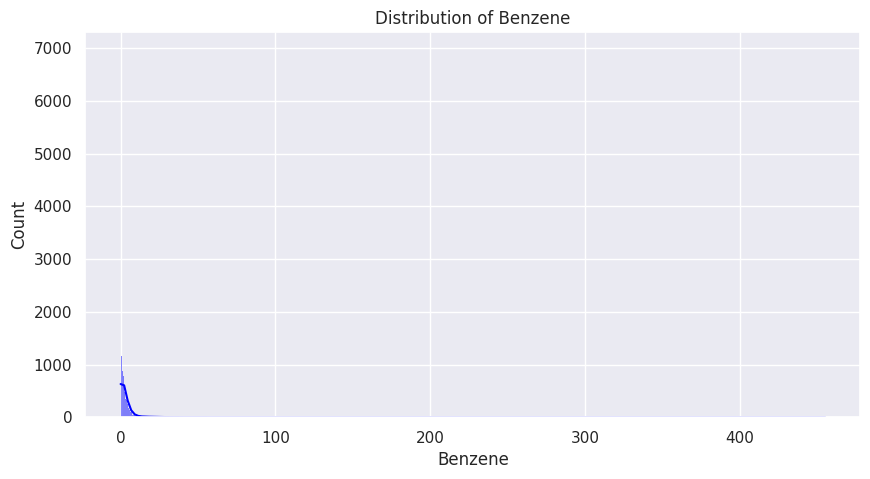

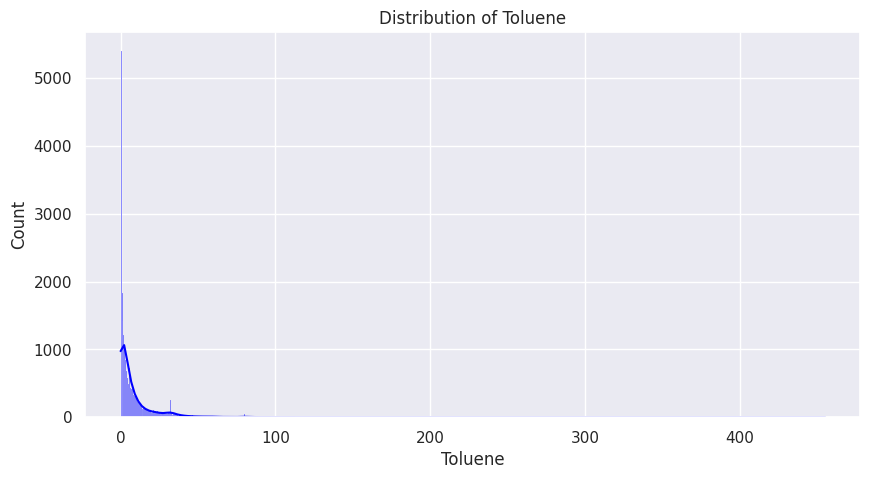

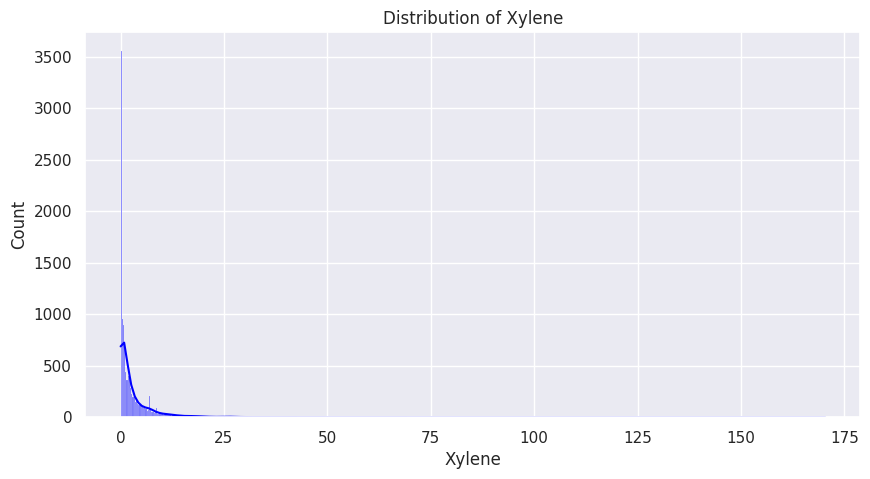

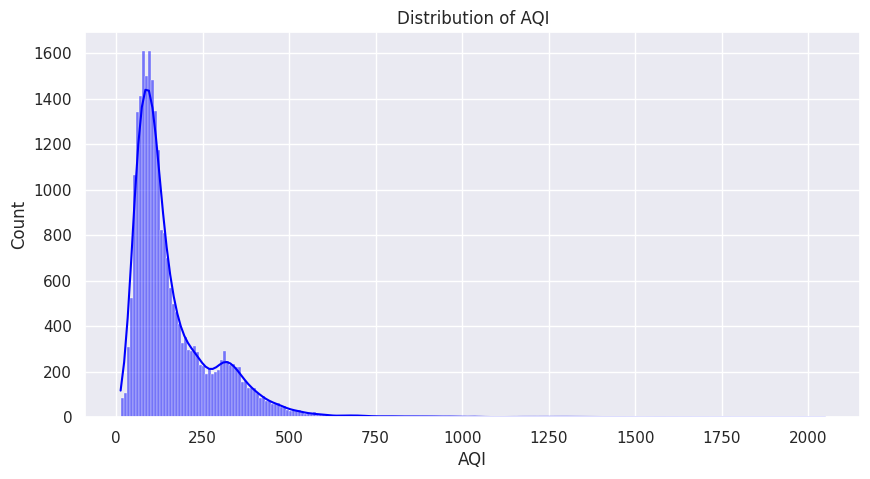

In [15]:
# Distribution plots
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

# Correlation heatmap

In [17]:
# Select relevant columns
selected_columns = [
    "PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"
]
target_column = "AQI"

data_filtered = data[selected_columns + [target_column]]

# Handle missing values
imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(data_filtered)
data_cleaned = pd.DataFrame(data_imputed, columns=data_filtered.columns)

# Define features (X) and target (y)
X = data_cleaned[selected_columns]
y = data_cleaned[target_column]


In [18]:
# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (20671, 12)
Testing set size: (8860, 12)


In [19]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "R²": r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                                 MAE          MSE        R²
Linear Regression          31.394235  2811.126534  0.820187
Random Forest              20.572692  1703.633615  0.891028
Decision Tree              29.136356  3805.008477  0.756614
Support Vector Regression  34.008334  6191.903347  0.603937
K-Nearest Neighbors        23.366603  2231.704176  0.857250


<ipython-input-20-b9857a5575b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R²"], palette="viridis")


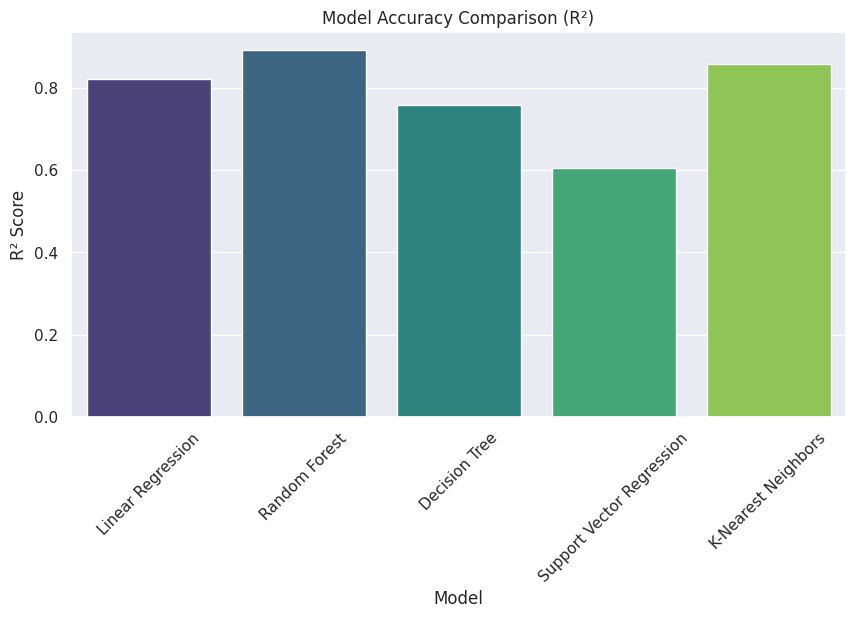

In [20]:
# Visualize R² scores for each model
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R²"], palette="viridis")
plt.title("Model Accuracy Comparison (R²)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler

# Feature Engineering: Add interaction terms or other derived features
X['PM_Ratio'] = X['PM2.5'] / (X['PM10'] + 1)  # Avoid division by zero
X['NO_Ratio'] = X['NO'] / (X['NO2'] + 1)

# Re-split the data after adding new features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distributions for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   scoring='r2',
                                   n_iter=10,  # Number of parameter combinations to test
                                   cv=2,  # Fewer cross-validation folds
                                   verbose=2,
                                   n_jobs=-1,
                                   random_state=42)

random_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Best R² Score: 0.8570569074751782


In [25]:
# Define fewer base models
base_models = [
    ('lr', LinearRegression()),  # Keep one simple linear model
    ('rf', RandomForestRegressor(random_state=42, n_estimators=50)),  # Fewer estimators
    ('dt', DecisionTreeRegressor(random_state=42))  # Keep one tree-based model
]

# Define Stacking Regressor with fewer base models
stacking_model = StackingRegressor(estimators=base_models, final_estimator=RandomForestRegressor(n_estimators=50))

# Train and evaluate
stacking_model.fit(X_train_scaled, y_train)
y_pred_stack = stacking_model.predict(X_test_scaled)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("Optimized Stacking Model Performance:")
print("MAE:", mae_stack)
print("R²:", r2_stack)


Optimized Stacking Model Performance:
MAE: 23.21381876868868
R²: 0.8739411219547895


In [26]:
# Use a simpler final estimator (e.g., Linear Regression)
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

stacking_model.fit(X_train_scaled, y_train)
y_pred_stack = stacking_model.predict(X_test_scaled)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("Simplified Final Estimator Performance:")
print("MAE:", mae_stack)
print("R²:", r2_stack)


Simplified Final Estimator Performance:
MAE: 21.23299451786745
R²: 0.8906392395868576


In [27]:
# Set n_jobs=-1 in models that support parallelism
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(random_state=42, n_estimators=50, n_jobs=-1)),
    ('dt', DecisionTreeRegressor(random_state=42))
]

stacking_model = StackingRegressor(estimators=base_models, final_estimator=RandomForestRegressor(n_jobs=-1))

# Train and evaluate
stacking_model.fit(X_train_scaled, y_train)
y_pred_stack = stacking_model.predict(X_test_scaled)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("Parallelized Stacking Model Performance:")
print("MAE:", mae_stack)
print("R²:", r2_stack)


Parallelized Stacking Model Performance:
MAE: 23.081623124275424
R²: 0.8740451607165213


In [28]:
import time

start_time = time.time()

# Train stacking model
stacking_model.fit(X_train_scaled, y_train)

print(f"Training Time: {time.time() - start_time} seconds")


Training Time: 92.35104441642761 seconds


In [29]:
# Use a subset of training data
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_scaled, y_train, test_size=0.7, random_state=42)

# Train the stacking model on the subset
stacking_model.fit(X_train_subset, y_train_subset)
y_pred_stack = stacking_model.predict(X_test_scaled)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("Subset Data Stacking Model Performance:")
print("MAE:", mae_stack)
print("R²:", r2_stack)


Subset Data Stacking Model Performance:
MAE: 24.543407154982006
R²: 0.8479501532982777


<ipython-input-32-cdf40eca8483>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results.index, y=results["R²"], palette="coolwarm")


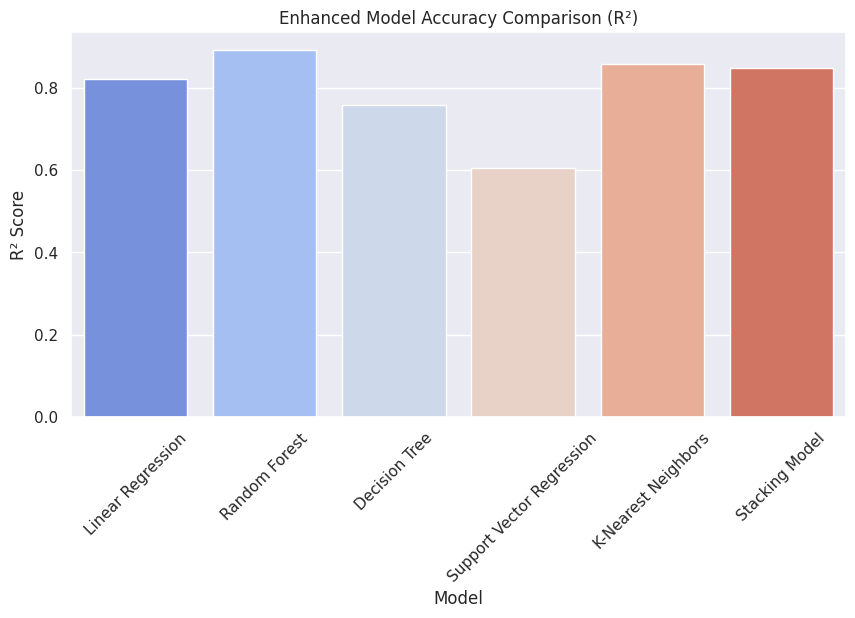

In [32]:
import pandas as pd # Import pandas

# ... (your existing code) ...

# Convert results to a DataFrame if it is not:
if not isinstance(results, pd.DataFrame):
    results = pd.DataFrame(results).T  # Transpose for proper orientation

# Add stacking results to the results DataFrame
results.loc["Stacking Model"] = {"MAE": mae_stack, "MSE": mean_squared_error(y_test, y_pred_stack), "R²": r2_stack}

# ... (rest of your code) ...
# Add stacking results to the results DataFrame
results.loc["Stacking Model"] = {"MAE": mae_stack, "MSE": mean_squared_error(y_test, y_pred_stack), "R²": r2_stack}

# Plot updated R² scores
plt.figure(figsize=(10, 5))
sns.barplot(x=results.index, y=results["R²"], palette="coolwarm")
plt.title("Enhanced Model Accuracy Comparison (R²)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code to load data and define grid_search) ...

# 1. Reduce data size for both grid search and cross-validation
sample_size = 0.3  # Adjust as needed, e.g., 0.2 for 20%
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=1-sample_size, random_state=42)

# 2. Optimize GridSearchCV
grid_search.fit(X_sample, y_sample)  # Fit on the reduced sample

# 3. Efficient Cross-Validation
cv_scores = cross_val_score(grid_search.best_estimator_,
                            X_sample,
                            y_sample,
                            cv=3,  # Reduce folds if necessary
                            scoring='r2',
                            n_jobs=-1)  # Use all available CPU cores

# ... (Rest of your code for evaluating and plotting results) ...

Fitting 3 folds for each of 81 candidates, totalling 243 fits


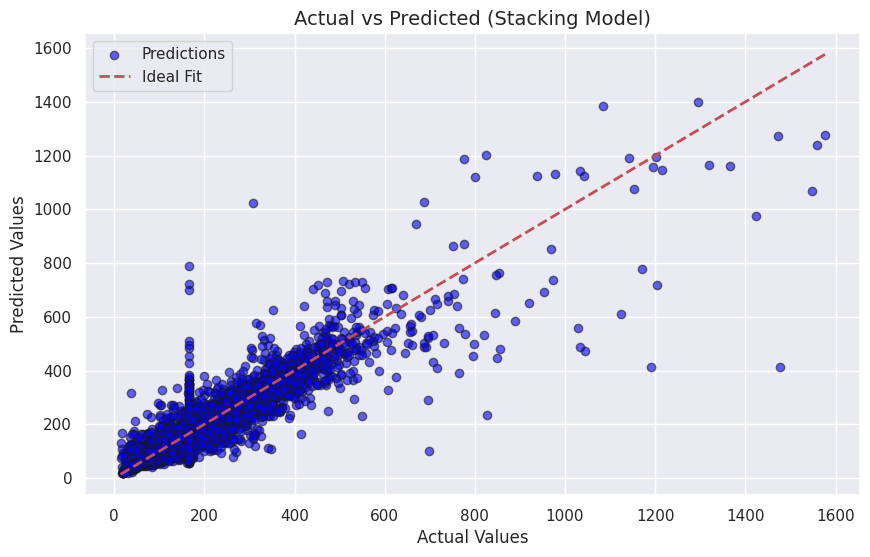

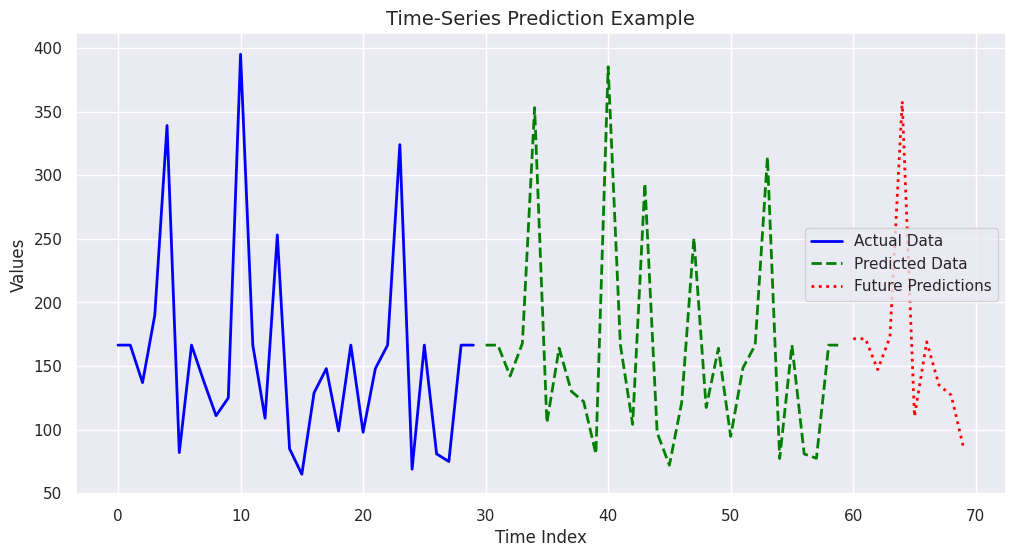

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Visualization for Actual vs Predicted Data
def plot_actual_vs_predicted(y_test, y_pred, title="Actual vs Predicted"):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k', label='Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2, label='Ideal Fit')
    plt.title(title, fontsize=14)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to visualize actual vs predicted
plot_actual_vs_predicted(y_test, y_pred_stack, title="Actual vs Predicted (Stacking Model)")

# Visualization for Time-Series Prediction
def plot_future_predictions(actual_data, predicted_data, future_predictions, title="Time-Series Prediction"):
    plt.figure(figsize=(12, 6))

    # Plot actual data
    plt.plot(range(len(actual_data)), actual_data, label='Actual Data', color='blue', linewidth=2)

    # Plot predicted data
    plt.plot(range(len(actual_data), len(actual_data) + len(predicted_data)), predicted_data, label='Predicted Data', color='green', linestyle='--', linewidth=2)

    # Plot future predictions
    plt.plot(range(len(actual_data) + len(predicted_data), len(actual_data) + len(predicted_data) + len(future_predictions)),
             future_predictions, label='Future Predictions', color='red', linestyle=':', linewidth=2)

    plt.title(title, fontsize=14)
    plt.xlabel('Time Index', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Simulated data for visualization
actual_data = y_test[:30]  # First 30 actual values for demonstration
predicted_data = y_pred_stack[:30]  # Corresponding predicted values
future_predictions = y_pred_stack[:10] + 5  # Simulate some future predictions (offset by 5 for visualization)

# Call the function to visualize time-series predictions
plot_future_predictions(actual_data, predicted_data, future_predictions, title="Time-Series Prediction Example")
